In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from itertools import combinations
from sklearn.preprocessing import MinMaxScaler,StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter,defaultdict
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import ks_2samp
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb


from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold
from sklearn.feature_selection import f_regression,f_classif,SelectKBest

pd.set_option("display.max_columns",202)
sns.set(color_codes=True)



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ROUTE = '/content/drive/My Drive/Colab Notebooks/Employee/data/'
hr = pd.read_csv(ROUTE+'hr2.csv')

In [ ]:
training = pd.read_csv(ROUTE+'hr_trainingv4.csv')
testing = pd.read_csv(ROUTE+'hr_testingv4.csv')
# training_lasso = pd.read_csv(ROUTE+'training_lasso.csv')

In [6]:
training.columns[0:20]

Index(['left', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'position_IT', 'position_RandD',
       'position_accounting', 'position_hr', 'position_marketing',
       'position_product_mng', 'position_sales', 'position_support',
       'position_technical', 'salary_high', 'salary_medium',
       'satisfaction_level*last_evaluation'],
      dtype='object')

In [7]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
hr.head() # (14999, 10) 
# categorical : ['Work_accident','promotion_last_5years', 'sales', 'salary']
# continuous :  ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']
# target : ['left']

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Visualization

In [9]:
t0_data = hr[hr.left==0]
t1_data = hr[hr.left==1]
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

Text(0, 0.5, 'Count')

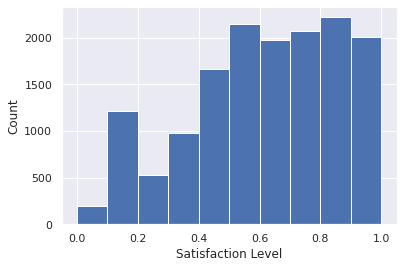

In [10]:
plt.hist(hr['satisfaction_level'],bins=10,range=(0,1))
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')

Text(0.5, 1.0, 'satisfaction_level')

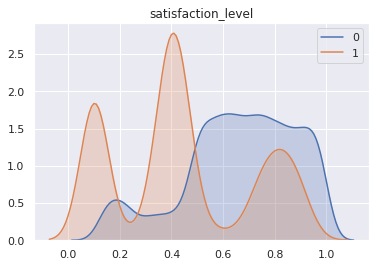

In [11]:
i=0
sns.kdeplot(t0_data.iloc[:,i],shade=True,label='0')
sns.kdeplot(t1_data.iloc[:,i],shade=True,label='1')
plt.title(f'{hr.columns[i]}')

Text(0, 0.5, 'Count')

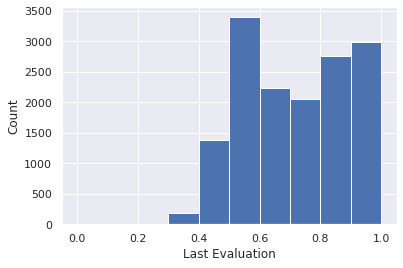

In [12]:
plt.hist(hr['last_evaluation'],bins=10,range=(0,1))
plt.xlabel('Last Evaluation')
plt.ylabel('Count')

Text(0.5, 1.0, 'last_evaluation')

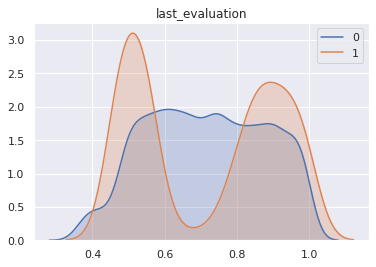

In [13]:
i=1
sns.kdeplot(t0_data.iloc[:,i],shade=True,label='0')
sns.kdeplot(t1_data.iloc[:,i],shade=True,label='1')
plt.title(f'{hr.columns[i]}')

Text(0.5, 1.0, 'number_project')

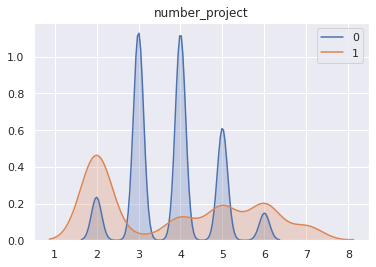

In [14]:
i=2
sns.kdeplot(t0_data.iloc[:,i],shade=True,label='0')
sns.kdeplot(t1_data.iloc[:,i],shade=True,label='1')
plt.title(f'{hr.columns[i]}')

Text(0, 0.5, 'Rate(%)')

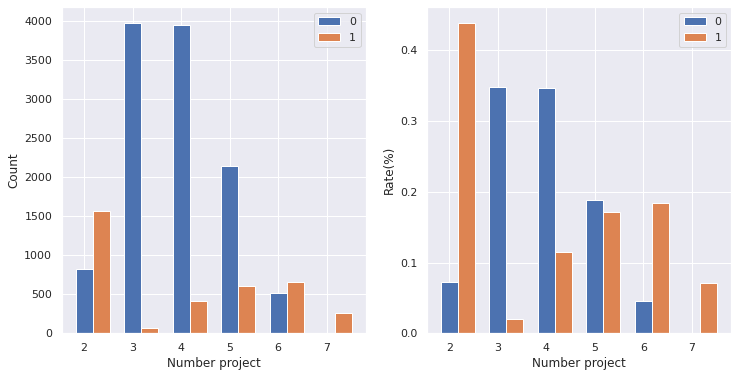

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

X = np.array([2,3,4,5,6,7])
Y0 = np.array([821,3983,3956,2149,519,0]) 
Y1 = np.array([1567,72,409,612,655,256]) 

plt.bar(X,Y0,width = 0.35,label='0')
plt.bar(X+0.35,Y1,width = 0.35,label='1')
plt.legend(loc='upper right')
plt.xlabel('Number project')
plt.ylabel('Count')
plt.subplot(1,2,2)
X = np.array([2,3,4,5,6,7])
Y0 = np.array([821,3983,3956,2149,519,0]) 
Y1 = np.array([1567,72,409,612,655,256]) 

plt.bar(X,Y0/sum(Y0),width = 0.35,label='0')
plt.bar(X+0.35,Y1/sum(Y1),width = 0.35,label='1')
plt.legend(loc='upper right')
plt.xlabel('Number project')
plt.ylabel('Rate(%)')


In [16]:
print(t0_data.number_project.value_counts())
print(t1_data.number_project.value_counts())

3    3983
4    3956
5    2149
2     821
6     519
Name: number_project, dtype: int64
2    1567
6     655
5     612
4     409
7     256
3      72
Name: number_project, dtype: int64


Text(0, 0.5, 'Count')

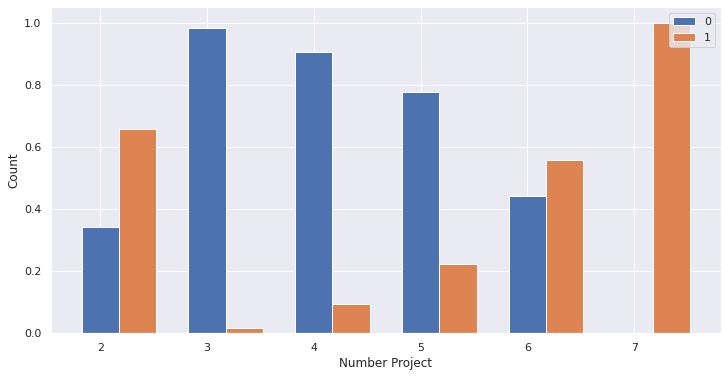

In [17]:
plt.figure(figsize=(12,6))

X = np.array([2,3,4,5,6,7])
Y0 = np.array([821,3983,3956,2149,519,0]) 
Y1 = np.array([1567,72,409,612,655,256]) 
T = Y0+Y1
plt.bar(X,Y0/T,width = 0.35,label='0')
plt.bar(X+0.35,Y1/T,width = 0.35,label='1')
plt.legend(loc='upper right')
plt.xlabel('Number Project')
plt.ylabel('Count')


Text(0.5, 0, 'Distribution')

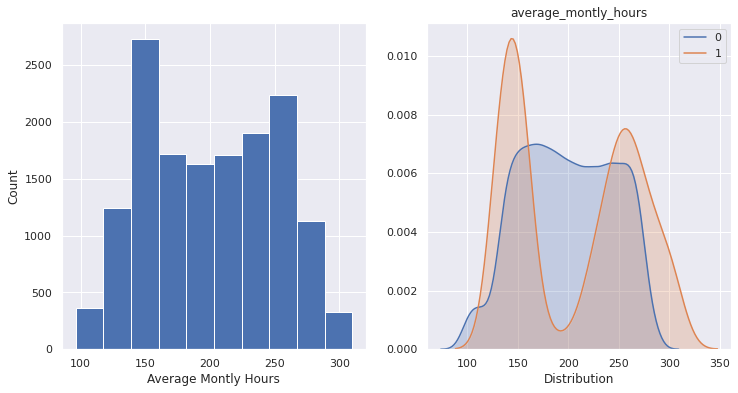

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.hist(hr['average_montly_hours'])
plt.xlabel('Average Montly Hours')
plt.ylabel('Count')

plt.subplot(1,2,2)
i=3
sns.kdeplot(t0_data.iloc[:,i],shade=True,label='0')
sns.kdeplot(t1_data.iloc[:,i],shade=True,label='1')
plt.title(f'{hr.columns[i]}')
plt.xlabel('Distribution')

Text(0.5, 1.0, 'average_montly_hours')

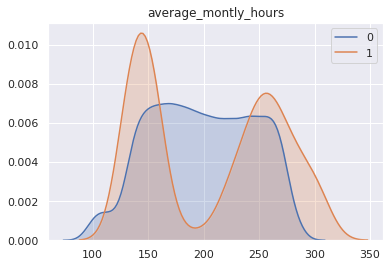

In [19]:
i=3
sns.kdeplot(t0_data.iloc[:,i],shade=True,label='0')
sns.kdeplot(t1_data.iloc[:,i],shade=True,label='1')
plt.title(f'{hr.columns[i]}')

Text(0, 0.5, 'Rate(%)')

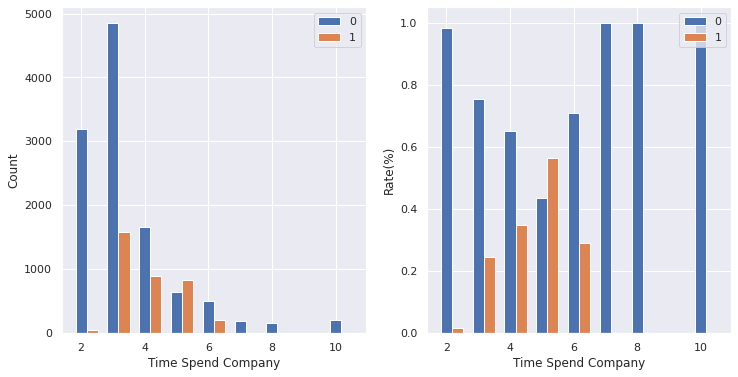

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

X = np.array([2,3,4,5,6,7,8,10])
Y0 = np.array([3191,4857,1667,640,509,188,162,214]) 
Y1 = np.array([53,1586,890,833,209,0,0,0]) 
T = Y0+Y1
plt.bar(X,Y0,width = 0.35,label='0')
plt.bar(X+0.35,Y1,width = 0.35,label='1')
plt.legend(loc='upper right')
plt.xlabel('Time Spend Company')
plt.ylabel('Count')
plt.subplot(1,2,2)


plt.bar(X,Y0/T,width = 0.35,label='0')
plt.bar(X+0.35,Y1/T,width = 0.35,label='1')
plt.legend(loc='upper right')
plt.xlabel('Time Spend Company')
plt.ylabel('Rate(%)')


([<matplotlib.axis.XTick at 0x7f3d04f37d30>,
 <a list of 2 Text major ticklabel objects>)

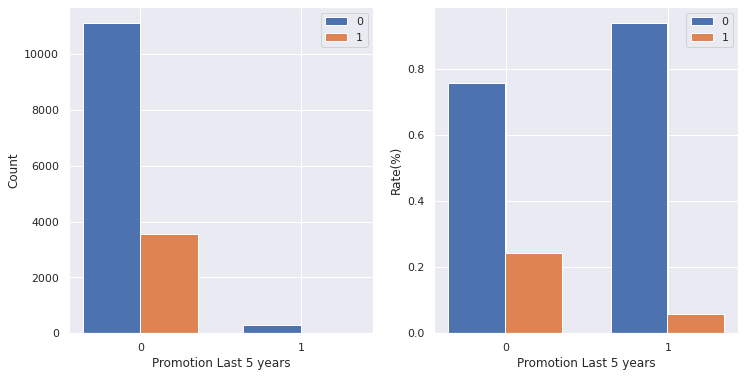

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

X = np.array([-0.18,0.82])
Y0 = np.array([11128,300]) 
Y1 = np.array([3552,19]) 
T = Y0+Y1
plt.bar(X,Y0,width = 0.36,label='0')
plt.bar(X+0.36,Y1,width = 0.36,label='1')
plt.legend(loc='upper right')
plt.xlabel('Promotion Last 5 years')
plt.ylabel('Count')
plt.xticks([0,1])

plt.subplot(1,2,2)


plt.bar(X,Y0/T,width = 0.35,label='0')
plt.bar(X+0.35,Y1/T,width = 0.35,label='1')
plt.legend(loc='upper right')
plt.xlabel('Promotion Last 5 years')
plt.ylabel('Rate(%)')
plt.xticks([0,1])


([<matplotlib.axis.XTick at 0x7f3d04e70748>,
 <a list of 2 Text major ticklabel objects>)

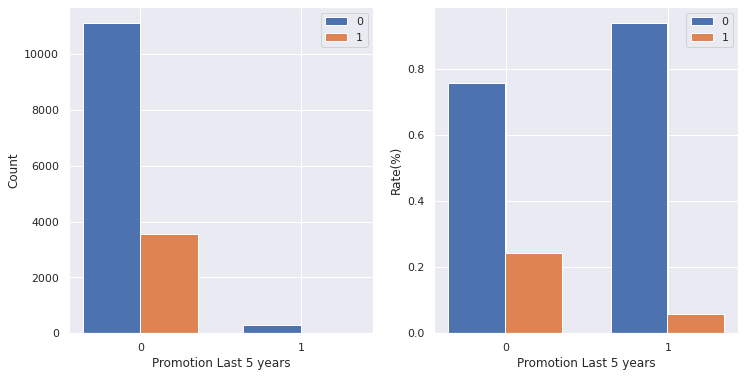

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

X = np.array([-0.18,0.82])
Y0 = np.array([11128,300]) 
Y1 = np.array([3552,19]) 
T = Y0+Y1
plt.bar(X,Y0,width = 0.36,label='0')
plt.bar(X+0.36,Y1,width = 0.36,label='1')
plt.legend(loc='upper right')
plt.xlabel('Promotion Last 5 years')
plt.ylabel('Count')
plt.xticks([0,1])

plt.subplot(1,2,2)


plt.bar(X,Y0/T,width = 0.35,label='0')
plt.bar(X+0.35,Y1/T,width = 0.35,label='1')
plt.legend(loc='upper right')
plt.xlabel('Promotion Last 5 years')
plt.ylabel('Rate(%)')
plt.xticks([0,1])



([<matplotlib.axis.XTick at 0x7f3d04be9da0>,
 [Text(0, 0, 'Low'), Text(0, 0, 'Medium'), Text(0, 0, 'High')])

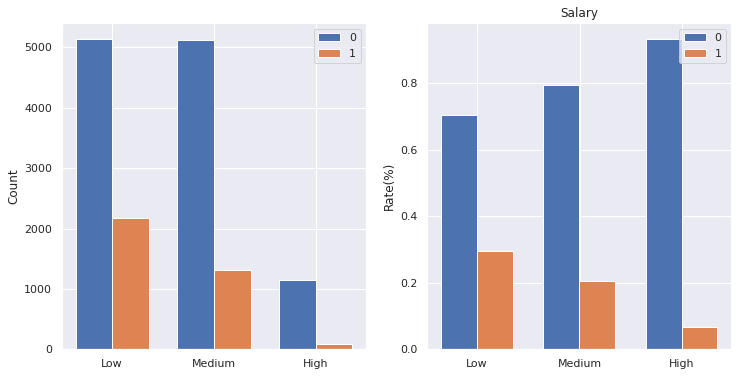

In [24]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

X = np.array([-0.18,0.82,1.82])
Y0 = np.array([5144,5129,1155]) 
Y1 = np.array([2172,1317,82]) 
T = Y0+Y1
plt.bar(X,Y0,width = 0.36,label='0')
plt.bar(X+0.36,Y1,width = 0.36,label='1')
plt.legend(loc='upper right')
plt.ylabel('Count')
plt.xticks([0,1,2],['Low','Medium','High'])

plt.subplot(1,2,2)


plt.bar(X,Y0/T,width = 0.35,label='0')
plt.bar(X+0.35,Y1/T,width = 0.35,label='1')
plt.legend(loc='upper right')
plt.title('Salary')
plt.ylabel('Rate(%)')
plt.xticks([0,1,2],['Low','Medium','High'])


([<matplotlib.axis.XTick at 0x7f3d04b59208>,
 [Text(0, 0, 'sales'),
  Text(0, 0, 'technical'),
  Text(0, 0, 'support'),
  Text(0, 0, 'IT'),
  Text(0, 0, 'product_mng'),
  Text(0, 0, 'RandD'),
  Text(0, 0, 'marketing'),
  Text(0, 0, 'accounting'),
  Text(0, 0, 'management'),
  Text(0, 0, 'hr')])

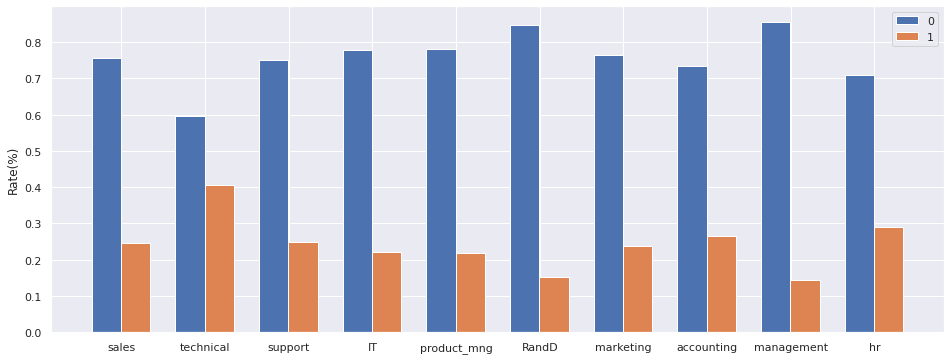

In [25]:
plt.figure(figsize=(16,6))

X = np.array([-0.18,0.82,1.82,2.82,3.82,4.82,5.82,6.82,7.82,8.82])
Y0 = np.array([3126,1023,1674,954,704,666,655,563,539,524]) 
Y1 = np.array([1014,697,555,273,198,121,203,204,91,215]) 
T = Y0+Y1

plt.bar(X,Y0/T,width = 0.35,label='0')
plt.bar(X+0.35,Y1/T,width = 0.35,label='1')
plt.legend(loc='upper right')
plt.ylabel('Rate(%)')
plt.xticks([0,1,2,3,4,5,6,7,8,9],['sales','technical','support','IT','product_mng','RandD','marketing','accounting','management','hr'])



## Original model

In [ ]:
pos_ls = hr['sales'].value_counts().index.tolist()
convert_dict={}
for i in range(len(pos_ls)):
  convert_dict[pos_ls[i]]=i

salary_ls = hr['salary'].value_counts().index.tolist()
convert_dict2={}
for i in range(len(salary_ls)):
  convert_dict2[salary_ls[i]]=i
# convert_dict2

In [ ]:
pos_trans = [convert_dict[i] for i in hr['sales']]
salary_trans = [convert_dict2[j] for j in hr['salary']]

hr_trans = hr
hr_trans['position'] = pos_trans
hr_trans['salary'] = salary_trans

In [ ]:
del hr_trans['sales']
hr_trans = hr[['left','satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company',
 'Work_accident', 'promotion_last_5years', 'salary', 'position']]
hr_trans.head()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(hr_trans.iloc[:,1:],hr_trans.iloc[:,0],test_size=0.3)
print(x_training.shape)
print(x_testing.shape)
print(y_training.shape)

In [ ]:
hr_trans.to_csv(ROUTE+'hr_trans.csv',index=False)
# training.to_csv(ROUTE+'hr_trainingv3.csv',index=False)


## Preprocessing

In [ ]:
scaler = StandardScaler()
to_sd_df = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
temp_sd = scaler.fit_transform(to_sd_df)

temp_df=pd.DataFrame(temp_sd,columns=['sl','le','np','amh','tsc'])
hr['satisfaction_level']=temp_df['sl']
hr['last_evaluation']=temp_df['le']
hr['number_project']=temp_df['np']
hr['average_montly_hours']=temp_df['amh']
hr['time_spend_company']=temp_df['tsc']

hr.describe()

In [ ]:
hr.nunique()

In [ ]:
hr['left'].value_counts()

In [ ]:
hr=hr.rename(columns={'sales':'position'})
hr=hr[['left','satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'position', 'salary']]
hr=pd.get_dummies(hr) # (14999, 21)

# categorical variable 以 position_management、salary_low為基底
hr=hr[['left','satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years','position_IT', 'position_RandD',
       'position_accounting', 'position_hr', 'position_marketing', 'position_product_mng', 'position_sales',
       'position_support','position_technical','salary_high','salary_medium']] # (14999, 19)

In [ ]:
X = hr.iloc[:,1:]
y = hr.iloc[:,0]

skf = StratifiedKFold(n_splits=10)
for idx,(train_index, test_index) in enumerate(skf.split(X,y)):
  x_train,y_train = X.iloc[train_index,:],y.iloc[train_index]
  x_test,y_test = X.iloc[test_index,:],y.iloc[test_index]
  break


over_samples=SMOTE(random_state=107354029)   
x_over_samples,y_over_samples=over_samples.fit_sample(x_train, y_train)

# smote_train_x=pd.DataFrame(over_samples_X,columns=x_train.columns)
x_train_smote=pd.DataFrame(x_over_samples,columns=['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years','position_IT', 'position_RandD',
       'position_accounting', 'position_hr', 'position_marketing', 'position_product_mng', 'position_sales',
       'position_support','position_technical','salary_high','salary_medium'])

In [ ]:
print(f'training: \n{y_train.value_counts()}\n')
print(f'testing: \n{y_test.value_counts()}\n')
print(f'oversample: \n{Counter(y_over_samples)}')


In [ ]:
interact = x_train.columns.tolist()

for i in list(combinations(interact, 2)):
    x_train_smote['%s'%i[0]+'*%s'%i[1]]=x_train_smote[i[0]]*x_train_smote[i[1]]
for i in list(combinations(interact, 2)):
    x_test['%s'%i[0]+'*%s'%i[1]]=x_test[i[0]]*x_test[i[1]]
print(len(x_train_smote.columns))

add_power=['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']
for term in add_power:
    x_train_smote['%s'%term+'^2']=x_train_smote[term]**2
    x_train_smote['%s'%term+'^3']=x_train_smote[term]**3
for term in add_power:
    x_test['%s'%term+'^2']=x_test[term]**2
    x_test['%s'%term+'^3']=x_test[term]**3
print(len(x_train_smote.columns))

In [ ]:
y_over_samples=pd.DataFrame(y_over_samples,columns=['left'])
y_test=pd.DataFrame(y_test,columns=['left'])
training=pd.concat([y_over_samples,x_train_smote],axis=1)
testing=pd.concat([y_test,x_test],axis=1)
training.to_csv(ROUTE+'hr_trainingv4.csv',index=False)
testing.to_csv(ROUTE+'hr_testingv4.csv',index=False)

##v1 : all_var_dummy(20)+interact(190)+power(10)
##v2 : select_var(20)+interact(153)+power(10)=183
##v3 : select_var(18)+interact(153)+power(10)=181
##v4 : select_var(18)+interact(153)+power(10)=181

## Logistic

In [ ]:
X_training,y_train = training.iloc[:,1:],training.iloc[:,0]
X_testing,y_test = testing.iloc[:,1:],testing.iloc[:,0]

# x_train,x_test = X_training.iloc[:,],X_testing.iloc[:,idx_select]
clf = LogisticRegression()  
clf.fit(X_training, y_train)
y_pred = clf.predict(X_testing)
y_pred_prob = [i[1] for i in clf.predict_proba(X_testing)]
auc = roc_auc_score(y_test,y_pred_prob)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(auc)

## LightGBM

In [ ]:
param ={'learning_rate': 0.1, 'max_bin': 300, 'min_data_in_leaf': 20, 'num_iterations': 100, 'num_leaves': 300}


In [27]:
# Lgbm 10 fold result
X = training.iloc[:,1:]
y = training.iloc[:,0]
x_test = testing.iloc[:,1:]
y_test = testing.iloc[:,0]
auc_ls=[]

skf = StratifiedKFold(n_splits=10)
for idx,(train_index, test_index) in enumerate(skf.split(X,y)):
  x_train,y_train = X.iloc[train_index,:],y.iloc[train_index]
  x_valid,y_valid = X.iloc[test_index,:],y.iloc[test_index]
  train_data = lgb.Dataset(x_train, label=y_train)
  test_data = lgb.Dataset(x_valid, label=y_valid) 
  clf = lgb.train( params =param, train_set=train_data, valid_sets = [train_data,test_data])
  y_pred_prob = clf.predict(x_test, num_iteration=clf.best_iteration)   
  y_pred=[]
  for i in y_pred_prob:
    if i >0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)

  auc = roc_auc_score(y_test,y_pred_prob)
  auc_ls.append(auc)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print([np.mean(auc_ls), np.std(auc_ls)])

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1142
           1       0.98      1.00      0.99       358

    accuracy                           0.99      1500
   macro avg       0.99      1.00      0.99      1500
weighted avg       0.99      0.99      0.99      1500

[[1134    8]
 [   0  358]]
[0.9995445606551282, 0.0004622360285340704]


In [ ]:
plt.figure(figsize=(12,6))
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)

# auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')

plt.plot(fpr,tpr,label=f'lgbm',lw=3,color='red')
plt.plot(fpr2,tpr2,label=f'origin',lw=3,color='yellow')

# plt.grid(b=True, which='major', color='#666666', linestyle='-')
# plt.minorticks_on()
# plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label=", auc="+str(auc),color='red')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.legend(loc=4)
plt.show()

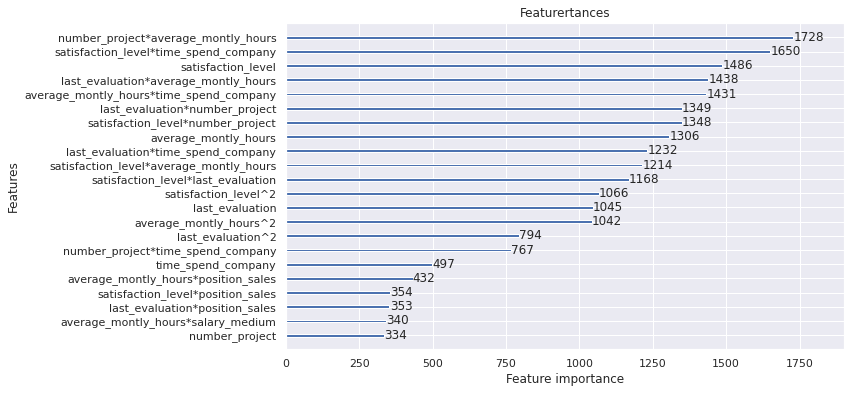

In [28]:
# plt.figure(figsize=(20,10))
lgb.plot_importance(clf, max_num_features=22,figsize=(10,6))
plt.title("Featurertances")
plt.show()

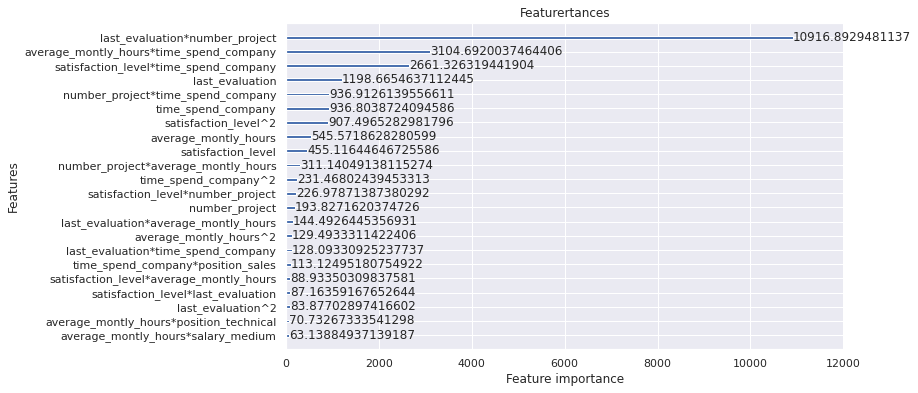

In [29]:
# plt.figure(figsize=(20,10))
lgb.plot_importance(clf, max_num_features=22,figsize=(10,6),importance_type='gain')
plt.title("Featurertances")
plt.show()

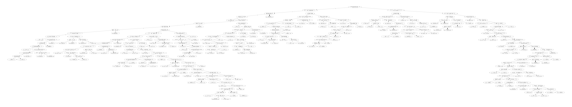

In [30]:
lgb.plot_tree(clf,figsize=(10,10),show_info='split_gain')


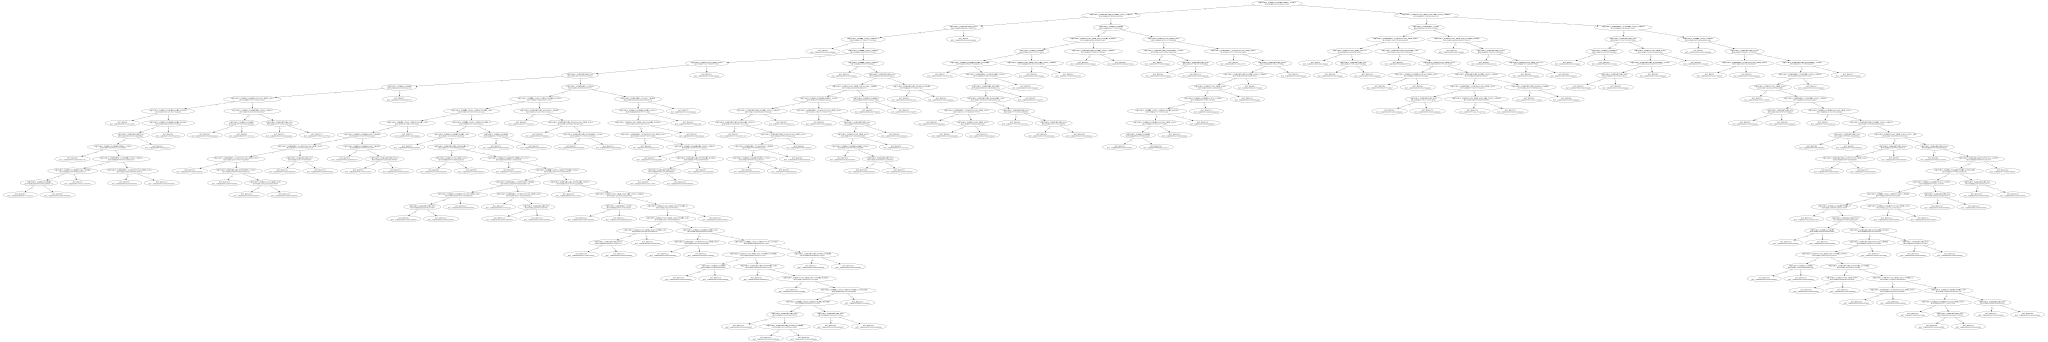

In [31]:
# lgb.plot_tree(clf,figsize=(10,10),show_info='split_gain')
lgb.create_tree_digraph(clf)


### lgbm_cv

In [ ]:
parameters = {
              # 'learning_rate': [0.01,0.05,0.1],
              'num_leaves':[300],
              'max_bin':[300],
              'min_data_in_leaf':[20],
              'num_iterations':[100,300,500,1000],
              'learning_rate':[0.1,0.05]
              
}


In [ ]:
x_train = training.iloc[:,1:]
y_train = training.iloc[:,0]

gbm = lgb.LGBMClassifier(boosting_type='gbdt',
                         objective = 'binary')
gsearch = GridSearchCV(gbm, param_grid=parameters, cv=5,scoring='roc_auc')
gsearch.fit(x_train, y_train)
print(gsearch.best_params_)
print(gsearch.best_score_)